## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
from math import isnan
from sklearn.tree import DecisionTreeRegressor
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

## Loading the data

In [2]:
data = pd.read_csv(r'ev-prediction.csv')
data

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
0,Volkswagen,Golf,e-Golf,85,08.02.2019,80,NaN,Electricity,Winter tires,0,0,1,Normal,17.8,0,1,53.0,1.0
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,Volkswagen,Golf,e-Golf,85,20.12.2014,26,5.62,Electricity,Winter tires,1,1,1,Normal,21.6,1,0,45.0,4.8
3341,Volkswagen,Golf,e-Golf,85,20.12.2014,77,14.25,Electricity,Winter tires,1,1,1,Normal,18.5,1,0,42.0,1.7
3342,Volkswagen,Golf,e-Golf,85,19.12.2014,26,4.97,Electricity,Winter tires,1,1,1,Normal,19.1,1,0,23.0,2.3
3343,Volkswagen,Golf,e-Golf,85,19.12.2014,20,4.76,Electricity,Winter tires,1,1,1,Fast,23.8,1,0,46.0,7.0


In [3]:
## Getting an overview of our data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3345 entries, 0 to 3344
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   manufacturer            3345 non-null   object 
 1   model                   3345 non-null   object 
 2   version                 3345 non-null   object 
 3   power(kW)               3345 non-null   int64  
 4   fuel_date               3345 non-null   object 
 5   trip_distance(km)       3344 non-null   object 
 6   quantity(kWh)           3344 non-null   float64
 7   fuel_type               3345 non-null   object 
 8   tire_type               3345 non-null   object 
 9   city                    3345 non-null   int64  
 10  motor_way               3345 non-null   int64  
 11  country_roads           3345 non-null   int64  
 12  driving_style           3345 non-null   object 
 13  consumption(kWh/100km)  3345 non-null   float64
 14  A/C                     3345 non-null   

In [4]:
## Checking for null values

data.isnull().sum()

manufacturer               0
model                      0
version                    0
power(kW)                  0
fuel_date                  0
trip_distance(km)          1
quantity(kWh)              1
fuel_type                  0
tire_type                  0
city                       0
motor_way                  0
country_roads              0
driving_style              0
consumption(kWh/100km)     0
A/C                        0
park_heating               0
avg_speed(km/h)           13
ecr_deviation              0
dtype: int64

In [5]:
## Eliminating the null values
nan_col = ['trip_distance(km)' ,'quantity(kWh)', 'avg_speed(km/h)'] 
for i in nan_col:
    temp = data[data[i].isnull()].index.tolist()
    data = data.drop(temp, axis = 0)
    print(temp)


[924]
[0]
[739, 795, 819, 895, 897, 923, 938, 939, 2337, 2594, 2795, 3228]


In [6]:
data

,manufacturer,model,version,power(kW),fuel_date,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,Volkswagen,Golf,e-Golf,85,06.02.2019,50,12.29,Electricity,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,Volkswagen,Golf,e-Golf,85,05.02.2019,43,8.68,Electricity,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,Volkswagen,Golf,e-Golf,85,04.02.2019,44,1.50,Electricity,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,Volkswagen,Golf,e-Golf,85,04.02.2019,76,14.44,Electricity,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
5,Volkswagen,Golf,e-Golf,85,03.02.2019,15,6.84,Electricity,Winter tires,1,0,0,Normal,16.1,0,1,23.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,Volkswagen,Golf,e-Golf,85,20.12.2014,26,5.62,Electricity,Winter tires,1,1,1,Normal,21.6,1,0,45.0,4.8
3341,Volkswagen,Golf,e-Golf,85,20.12.2014,77,14.25,Electricity,Winter tires,1,1,1,Normal,18.5,1,0,42.0,1.7
3342,Volkswagen,Golf,e-Golf,85,19.12.2014,26,4.97,Electricity,Winter tires,1,1,1,Normal,19.1,1,0,23.0,2.3
3343,Volkswagen,Golf,e-Golf,85,19.12.2014,20,4.76,Electricity,Winter tires,1,1,1,Fast,23.8,1,0,46.0,7.0


In [7]:
## Checking the datatypes

data['trip_distance(km)'].astype(str)
data['trip_distance(km)'].dtype

dtype('O')

In [8]:
a = ','
del_index = []
for i in range(len(data['trip_distance(km)'])):
    if a in data['trip_distance(km)'].iloc[i]:
        del_index.append(data.index[i])
        #print(str(i) + ' ' + data['trip_distance(km)'].iloc[i])
        #drop = data.drop([i],axis =0)
data = data.drop(del_index ,axis =0)     

In [9]:

for i in range(len(data['trip_distance(km)'])):
    data['trip_distance(km)'].iloc[i] = int(float(data['trip_distance(km)'].iloc[i]))
data['trip_distance(km)'] = data['trip_distance(km)'].astype(int)
data['trip_distance(km)'].dtype

dtype('int32')

In [10]:
df = data
drop_cols = ['manufacturer','model','fuel_type','version','fuel_date']
df = df.drop(drop_cols , axis =1)
df

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,85,50,12.29,Winter tires,0,0,1,Normal,15.5,0,1,47.0,-1.3
2,85,43,8.68,Winter tires,0,1,1,Normal,18.0,0,1,58.0,1.2
3,85,44,1.50,Winter tires,0,1,1,Normal,16.1,0,1,43.0,-0.7
4,85,76,14.44,Winter tires,0,1,0,Normal,19.0,0,1,76.0,2.2
5,85,15,6.84,Winter tires,1,0,0,Normal,16.1,0,1,23.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,85,26,5.62,Winter tires,1,1,1,Normal,21.6,1,0,45.0,4.8
3341,85,77,14.25,Winter tires,1,1,1,Normal,18.5,1,0,42.0,1.7
3342,85,26,4.97,Winter tires,1,1,1,Normal,19.1,1,0,23.0,2.3
3343,85,20,4.76,Winter tires,1,1,1,Fast,23.8,1,0,46.0,7.0


## Visualizing the Data

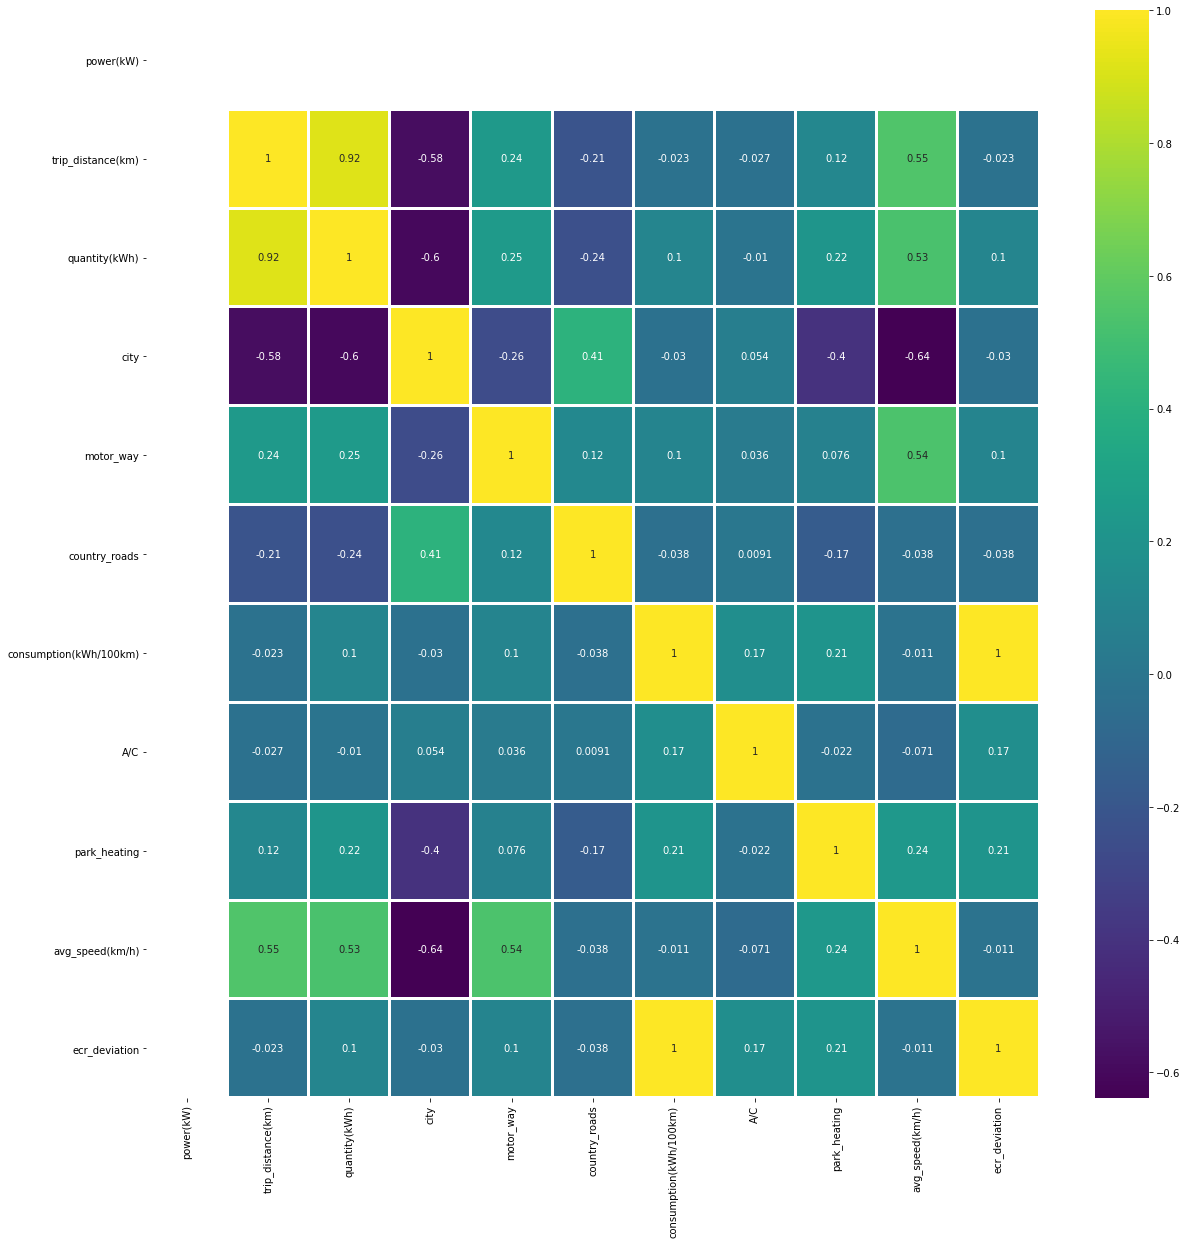

In [11]:
ax = plt.subplots(figsize=(20,20))
heatmap = sns.heatmap(data.corr(), annot= True , linewidth = 2 , cmap = 'viridis')

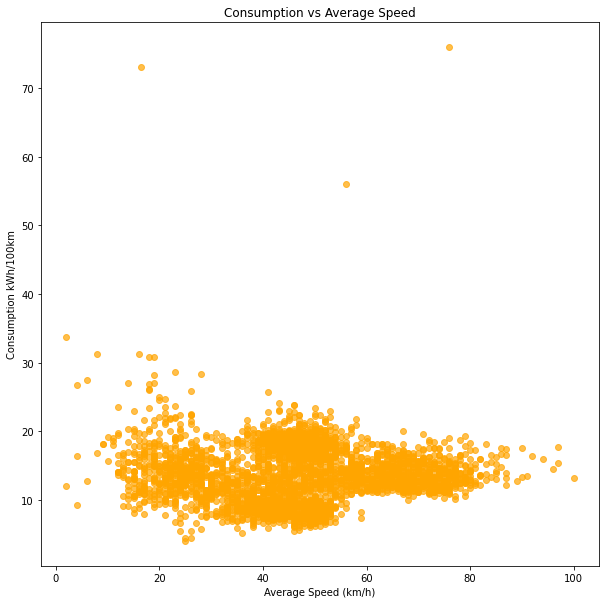

In [12]:
plt.figure(figsize = (10,10))
plt.scatter(data['avg_speed(km/h)'],data['consumption(kWh/100km)'],c='orange',alpha=0.7)
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Consumption kWh/100km')
plt.title('Consumption vs Average Speed')
plt.show()

<AxesSubplot:xlabel='consumption(kWh/100km)', ylabel='Density'>

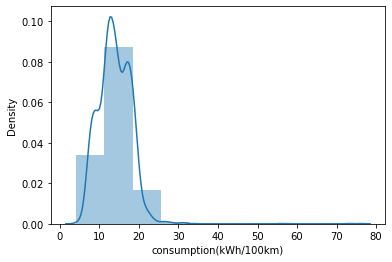

In [13]:
sns.distplot(data['consumption(kWh/100km)'], bins = 10)

## Converting categorical data to numerical  data

In [14]:
le = LabelEncoder()
le1 = LabelEncoder()
le.fit(df['tire_type'].unique())
list1 = le.transform(df['tire_type']) 
df['tire_type'] = list1

le1.fit(df['driving_style'].unique())
list2 = le1.transform(df['driving_style']) 
df['driving_style'] = list2
df

,power(kW),trip_distance(km),quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation
1,85,50,12.29,1,0,0,1,2,15.5,0,1,47.0,-1.3
2,85,43,8.68,1,0,1,1,2,18.0,0,1,58.0,1.2
3,85,44,1.50,1,0,1,1,2,16.1,0,1,43.0,-0.7
4,85,76,14.44,1,0,1,0,2,19.0,0,1,76.0,2.2
5,85,15,6.84,1,1,0,0,2,16.1,0,1,23.0,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3340,85,26,5.62,1,1,1,1,2,21.6,1,0,45.0,4.8
3341,85,77,14.25,1,1,1,1,2,18.5,1,0,42.0,1.7
3342,85,26,4.97,1,1,1,1,2,19.1,1,0,23.0,2.3
3343,85,20,4.76,1,1,1,1,0,23.8,1,0,46.0,7.0


We have created this model so that researchers can predict the consumption for the above parameters. This will help in building a better and more efficient electric car


## Training Models

### Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [16]:
## Splitting data into dependent and independent variables 

y= df['consumption(kWh/100km)']
X = df[['power(kW)','trip_distance(km)','quantity(kWh)','tire_type','city','motor_way','country_roads','driving_style','A/C','park_heating','avg_speed(km/h)']]

In [17]:
## Scaling data

sc = MinMaxScaler().fit(X)
X = sc.transform(X)
X

array([[0.        , 0.07788162, 0.14517082, ..., 0.        , 1.        ,
        0.45918367],
       [0.        , 0.06697819, 0.10249438, ..., 0.        , 1.        ,
        0.57142857],
       [0.        , 0.06853583, 0.01761438, ..., 0.        , 1.        ,
        0.41836735],
       ...,
       [0.        , 0.04049844, 0.05863577, ..., 1.        , 0.        ,
        0.21428571],
       [0.        , 0.03115265, 0.05615321, ..., 1.        , 0.        ,
        0.44897959],
       [0.        , 0.06697819, 0.09280057, ..., 1.        , 0.        ,
        0.16326531]])

In [18]:
## Splitting our data for training and testing

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0, test_size= 0.2)

In [19]:
## Polynomial Regression

poly_x = PolynomialFeatures(2).fit_transform(X_train)
lr2 = LinearRegression()
lr2.fit(poly_x, y_train)
poly_test_x = PolynomialFeatures(2).fit_transform(X_test)
pred = lr2.predict(poly_test_x)
score = r2_score(y_test,pred)
score

0.48937514125880477

### As the score for Polynomial Regression is low we decided to use a different model

In [20]:
## Lasso Regression

from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.001, max_iter = 1000).fit(poly_x, y_train)
y_train_pred = lasso.predict(poly_x)

y_test_pred = lasso.predict(poly_test_x)
score_lasso = r2_score(y_test,y_test_pred)
score_lasso

0.49647609769801127

In [21]:
## Ridge Regression

from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.01, max_iter = 150).fit(poly_x, y_train)

#y_train_pred = ridge.predict(poly_x)
y_test_pred = ridge.predict(poly_test_x)
ridge_r2score = r2_score(y_test,y_test_pred)
#regression_scores.append(('Ridge Regression', ridge_r2score))
ridge_r2score

0.5144227132696836

# Neural Networks


In [22]:
from sklearn.neural_network import MLPRegressor

In [23]:
## Neural Networks

nr = MLPRegressor(hidden_layer_sizes= (400),max_iter = 3000).fit(X_train , y_train)
pred = nr.predict(X_test)
nr.score(X_test, y_test)

0.7022884635107961

## Random Forests

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
## Random Forest Regressor

regr = RandomForestRegressor(n_estimators=50,max_depth=300, random_state=0)
regr.fit(X_train,y_train)

RandomForestRegressor(max_depth=300, n_estimators=50, random_state=0)

In [26]:
forest_pred = regr.predict(X_test)

In [27]:
regr.score(X_test,y_test)

0.53774823648993

### Since the MPL Regressor gave us the best score, we will use it for predicitng the data

In [28]:
consumption_pred = nr.predict(X_test)
data2={
    'Actual value':y_test,
    'Predicted value':consumption_pred
}
consumption_result = pd.DataFrame(data2)
consumption_result['Difference'] = consumption_result['Actual value']-consumption_result['Predicted value']
consumption_result

,Actual value,Predicted value,Difference
3132,18.9,17.294907,1.605093
2895,17.7,17.213962,0.486038
883,12.7,13.227230,-0.527230
2362,8.2,8.364020,-0.164020
2246,8.5,8.362464,0.137536
...,...,...,...
3152,8.6,8.020098,0.579902
1567,18.6,17.501997,1.098003
2321,16.9,12.145619,4.754381
2830,18.5,18.355585,0.144415


# Driving Range Prediction using Battery quantity

In [29]:
quantity = df['quantity(kWh)']
distance = df['trip_distance(km)']

quantity_linear_reg = LinearRegression()
quantity_linear_reg.fit(X=np.array(quantity).reshape(-1,1), y=np.array(distance).reshape(-1,1))
q_slope = quantity_linear_reg.coef_[0]
q_intercept = quantity_linear_reg.intercept_
q_predicted_distances = q_intercept + q_slope * quantity
q_predicted_distances

1       84.835721
2       60.644862
3       12.531188
4       99.243019
5       48.314896
          ...    
3340    40.139592
3341    97.969816
3342    35.783897
3343    34.376672
3344    55.149986
Name: quantity(kWh), Length: 3328, dtype: float64

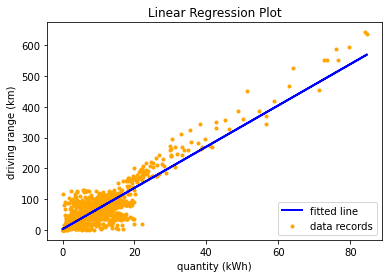

In [30]:
fig = plt.figure()
plt.scatter(x=quantity, y=distance, s=15, c='orange', linewidths=0.1)
plt.plot(quantity, q_predicted_distances, c='blue', linewidth=2)
plt.legend(('fitted line', 'data records'), loc='lower right')
plt.title('Linear Regression Plot')
plt.xlabel('quantity (kWh)')
plt.ylabel('driving range (km)')
plt.show()

## Driving Range using average speed

In [31]:
avg_speed = df['avg_speed(km/h)']
speed_linear_reg = LinearRegression()
speed_linear_reg.fit(X=np.array(avg_speed).reshape(-1,1), y=np.array(distance).reshape(-1,1))
s_slope = speed_linear_reg.coef_[0]
s_intercept = speed_linear_reg.intercept_
s_predicted_distances = s_intercept + s_slope * avg_speed
s_predicted_distances

1       42.577923
2       62.378300
3       35.377786
4       94.778917
5       -0.622899
          ...    
3340    38.977855
3341    33.577752
3342    -0.622899
3343    40.777889
3344    -9.623070
Name: avg_speed(km/h), Length: 3328, dtype: float64

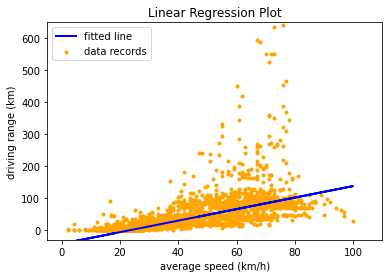

In [32]:
fig = plt.figure()
plt.scatter(x=avg_speed, y=distance, s=15, c='orange', linewidths=0.1)
plt.plot(avg_speed, s_predicted_distances, c='blue', linewidth=2)
plt.legend(('fitted line', 'data records'), loc='upper left')
plt.title('Linear Regression Plot')
plt.xlabel('average speed (km/h)')
plt.ylabel('driving range (km)')
plt.xlim(-5, 110), plt.ylim(-30, 650)
plt.show()

## Driving Range Prediction using features

In [33]:
driving_features = df[['quantity(kWh)','tire_type','city','motor_way','country_roads','driving_style','A/C','park_heating','avg_speed(km/h)']]
d_distance = df['trip_distance(km)']
driving_features

,quantity(kWh),tire_type,city,motor_way,country_roads,driving_style,A/C,park_heating,avg_speed(km/h)
1,12.29,1,0,0,1,2,0,1,47.0
2,8.68,1,0,1,1,2,0,1,58.0
3,1.50,1,0,1,1,2,0,1,43.0
4,14.44,1,0,1,0,2,0,1,76.0
5,6.84,1,1,0,0,2,0,1,23.0
...,...,...,...,...,...,...,...,...,...
3340,5.62,1,1,1,1,2,1,0,45.0
3341,14.25,1,1,1,1,2,1,0,42.0
3342,4.97,1,1,1,1,2,1,0,23.0
3343,4.76,1,1,1,1,0,1,0,46.0


In [34]:
X_train_d,X_test_d,y_train_d,y_test_d = train_test_split(driving_features,d_distance,random_state=0)
model = MLPRegressor(max_iter=800).fit(X_train_d,y_train_d)
train_acc = model.score(X_train_d,y_train_d)
test_acc = model.score(X_test_d,y_test_d)


In [35]:
data1 = {
    'Training data accuracy':[train_acc],
    'Testing data accuracy score':[test_acc]
}
range_result = pd.DataFrame(data1)

In [36]:
range_result

,Training data accuracy,Testing data accuracy score
0,0.906131,0.924212


In [37]:
dist_pred = model.predict(X_test_d)

data1 = {
    'Actual value':list(y_test_d),
    'Predicted value':list(dist_pred)
}
final_result = pd.DataFrame(data1)
final_result

,Actual value,Predicted value
0,20,24.957423
1,20,22.243950
2,126,72.814009
3,20,21.254262
4,20,19.034292
...,...,...
827,2,33.303407
828,88,80.281350
829,19,16.329196
830,163,144.987000


## Conclusion: 
We have trained models for predicting the driver distance and consumption rate for electric cars. The driver distance predictor will help the driver gain some insight as to how far he can drive. The consumption rate predictor will help researchers improve the efficiency of electric cars. This will encourage more and more people to use electric cars and will help us reduce environmental problems like pollution and global warming